# Motivation

How do we make machine learn to do something without explicitely programming it to do that thing?

**Example tasks:**

- Identify if image contains a cat
- Classify handwritten characters
- Generate music
- Play go
- Translation
- Write an essay (not for submission of course)
- ...

We could programme a computer to do these thigns, but it gets harder the less we know how to write such programme. (Imagine someone asking you to handcraft a translator)

**Consider this trivial task:**

We have four-pixel images, and we want to classify them as 1, 7, or L.

Left to right: 7, L, 1, 1

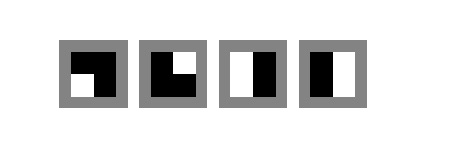

### Cont

**Okay, maybe you wrote a bunch of if else statements and got something to work**

**What if...** new language with other ways of writing 1, 7, L—

Left to right: 7, L, 1, 1


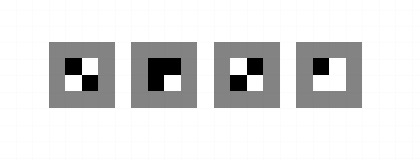

...That just broke our programme

**Ideas:**

- Decision tree?
- Handcrafting an algorithm (people have done that, but it gets very complicated)
- Neural network!

# Introduction to PyTorch

In [ ]:
from matplotlib import pyplot as plt
import torch # you can't pytorch without importing it
torch.manual_seed(0) # this is just to keep random things consistent for demo

## Tensor Operations

One thing you will be working with a lot is tensor. A tensor can be thought of as a high-dimensional matrix (which itself could be though of as a higher dimensional vector).

Let's try making some vectors and matrices first.



In [ ]:
v =  # a 2D vector
v, v.shape

In [ ]:
# matrix ⌈ 2  1 ⌉
#        ⌊ 3  4 ⌋
A = 
# matrix ⌈ -1  4 ⌉
#        ⌊ 2   0 ⌋
B = 
print(A)
print(B)

And we can do matrix operations on them

In [ ]:
torch.matmul(A, v) # this is a matrix-vector multiplication!

In [ ]:
torch.matmul(A, B)

In [ ]:
A.T # transpose

In [ ]:
torch.det(A.float()) # determinant (doesn't work for int matrix, apparently)

In [ ]:
X = # a tensor
X

A very powerful thing torch lets you do is tensor calculus. Let's create a random tensor with gradient enabled.

In [ ]:
x = torch.randn((2,3,4)) # track gradients TODO turn on require grad
print(x.shape)
print(x)

Now, if we do a bunch of calculations based on the tensor... Notice we get a single tensor that's the mean of w after all these business

In [ ]:
y = x + 3.0
z = y*y
w = z.mean()
w

Watch the magic as we call `w.backward` — it calculates the partial derivative of values in the tensors that lead to the value of `w` and eventually goes back to `x`, which we said `requires_grad=True`

In [ ]:
w.backward()
print(x.grad) # each element is ∂w/∂x

Another example that shows the partial derivative relation more clearly

In [ ]:
x = torch.tensor([2.0, 6.0], requires_grad = True) # track gradients
y = x**3
z = y.sum()
z.backward()
x.grad

There are ways to stop torch from keeping track of gradient when you don't want it to. Examples are as follows, but we won't go into detail right now

```python
x.requires_grad_(False)
y = x.detach() + 2
with torch.no_grad():
  y = x.detach() + 2
```

## Linear Regression with PyTorch — optimizing one variable

In [ ]:
# we are trying to fit f(x) = 3 * x
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
Y = torch.tensor([3.07, 5.93, 9.04, 11.97, 15.12, 17.89], dtype=torch.float32)

In [ ]:
plt.scatter(X, Y) # looks linear enough!

In [ ]:
# we try to learn this c in f(x) = c * x
c = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

def predict(x):
  # forward TODO
  pass

# Mean squared error
def calc_loss(y, y_hat):
  # MSE TODO
  pass

# training params
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # do prediction TODO
    y_hat = 

    # calculate loss TODO
    loss = 

    # calculate partial derivatives
    loss.?

    # optimize using those partial derivatives
    with torch.no_grad():
        c -= learning_rate * c.grad
    
    # clear gradient (for next round)
    c.grad.zero_()

    if epoch % 10 == 0:
        print(f'<epoch {epoch+1}> c = {c.item():.4f}, loss = {loss.item():.4f}, f(5) prediction = {predict(5).item():.3f}')

In [ ]:
# examine the predictions
plt.scatter(X, Y) # original
with torch.no_grad():
    Y_hat = [predict(x) for x in X]
plt.scatter(X, Y_hat) 